## Simple Linear Regression

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


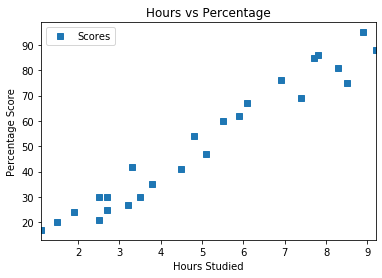

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

In [5]:
# Preparing the data,divide the data into IDV, DV
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
# Splitting the data set into training and test 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
# Model Building
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [33]:
print("coefficient = ",regressor.coef_)
print("intecept value =",regressor.intercept_)

coefficient =  [9.91065648]
intecept value = 2.018160041434683


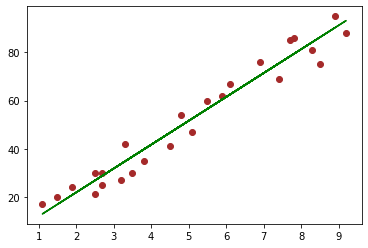

In [57]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y, color ="brown")
plt.plot(X,line, color = "green")
plt.show()

# Making Predictions

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours.reshape(1,-1)
own_pred = regressor.predict(hours)

In [23]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

# Data Visualization

In [97]:
data = data.sort_values("Hours")
import plotly.express as px
df = px.data.gapminder()
px.scatter(data, x="Hours", y="Scores", animation_frame="Hours", animation_group="Scores",
            size="Scores", color="Scores",
           log_x=True, size_max=20, range_x=[1,10], range_y=[0,100])